<a href="https://colab.research.google.com/github/asadiv/Pytorch/blob/main/04__pytorch__custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
# food 101 (3 clasees with 10%                     data)
import requests
import zipfile
from pathlib import Path

#setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

Did not find data/pizza_steak_sushi directory, creating one...


In [8]:
#dowload data

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

#unzip

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

Unzipping pizza, steak, sushi data...


In [9]:
# data preparation and extraction
import os
def walkthrough_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
walkthrough_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"


300
Random image path: data/pizza_steak_sushi/train/steak/1961025.jpg
Random image class: steak
image height: 512
image width: 512


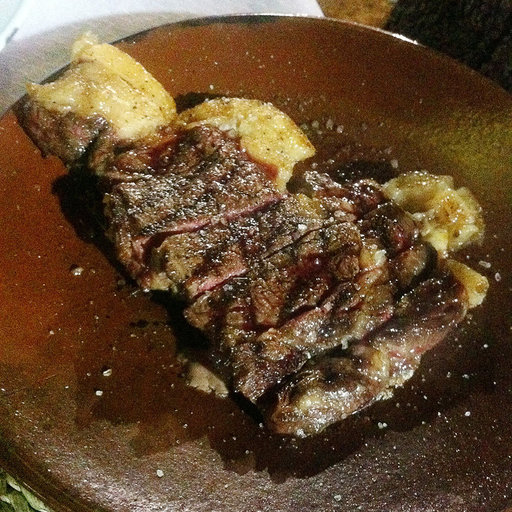

In [19]:
import random
from PIL import Image
random.seed(42)

#get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(len(image_path_list))
rand_img_path = random.choice(image_path_list)
img = Image.open(rand_img_path)
img_class = rand_img_path.parent.stem
print(f"Random image path: {rand_img_path}")
print(f"Random image class: {img_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img